In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("glcbin24.0h_regbg_gsc0124578.csv",names=['mjd','2','3','2_20','2e20','2_4','2e4','4_10','4e10','10_20','10e20','0'])
print(data)

               mjd             2             3      2_20      2e20       2_4  \
0     55054.500000  55054.000000  55055.000000  3.083737  0.043039  1.453524   
1     55055.500000  55055.000000  55056.000000  2.702853  0.036104  1.398513   
2     55056.500000  55056.000000  55057.000000  4.385787  0.050971  2.113245   
3     55057.500000  55057.000000  55058.000000  3.524084  0.043160  1.724863   
4     55058.500000  55058.000000  55059.000000  3.170785  0.043974  1.547515   
...            ...           ...           ...       ...       ...       ...   
4142  60290.499965  60289.999965  60290.999965  0.043791  0.012462  0.012334   
4143  60291.499965  60290.999965  60291.999965  0.054353  0.015484  0.012361   
4144  60292.499965  60291.999965  60292.999965  0.039906  0.015571  0.011184   
4145  60293.499965  60292.999965  60293.999965  0.034516  0.016562  0.006248   
4146  60294.499965  60293.999965  60294.999965  0.050368  0.018613  0.005739   

           2e4      4_10      4e10     

In [3]:
mjd = data["mjd"] #2009.08.14-2023.04.16
c2_20 = data["2_20"]
c4_20 = data["4_10"] + data["10_20"]
c2_4 = data["2_4"]
e2_4 = data["2e4"]
e2_20 = data["2e20"]
e4_20 = e2_20**2 +e2_4**2

time = np.array([59091.04296296, 59092.43438657, 59093.75957176, 59094.75350694, 59095.74747685, 59096.80778935, 59097.60306713, \
        59099.06119213, 59100.58584491, 59101.24880787,59102.44224537, 59103.43688657, \
        59104.63054398, 59106.61993056, 59107.61452546, 59110.00105324, 59110.22834491, 59111.06148148, \
        59111.21150463, 59113.11572917, 59117.5546875 , 59121.19841435, 59123.58354167, 59125.83648148, 59127.62585648])

hr = c4_20/c2_4
ehr = e4_20**2/c2_4**2 + e2_4**2*c4_20**2/c2_4**4
#print(np.where(mjd<59091))
print(mjd[3279])
print(mjd[3280])
#print(np.where(mjd>59127))
print(mjd[3313])
print(mjd[3314])
print(hr[3279:3314])

59073.499965
59094.499965
59127.499965
59128.499965
3279    1.330318
3280    1.251866
3281    1.347453
3282    1.472741
3283    1.057839
3284    2.119945
3285    1.282063
3286    1.466445
3287    2.027585
3288    1.562378
3289    1.227008
3290    1.695157
3291    1.376901
3292    1.429132
3293    1.370172
3294    1.241562
3295    1.382866
3296    1.570298
3297    1.645275
3298    1.312896
3299    1.472551
3300    1.332086
3301    1.146925
3302    1.257615
3303    1.380748
3304    1.376002
3305    1.135291
3306    1.235733
3307    1.416851
3308    1.299074
3309    1.001283
3310    3.635749
3311    0.796497
3312    1.843716
3313    1.625928
dtype: float64


/var/folders/l8/y44hjpdj1sv516jrp7xn86jc0000gn/T/ipykernel_25455/1869824809.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.errorbar(mjd,c2_20,e2_20,linestyle="none",fmt="k",marker='.',markersize=3,color='blue')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


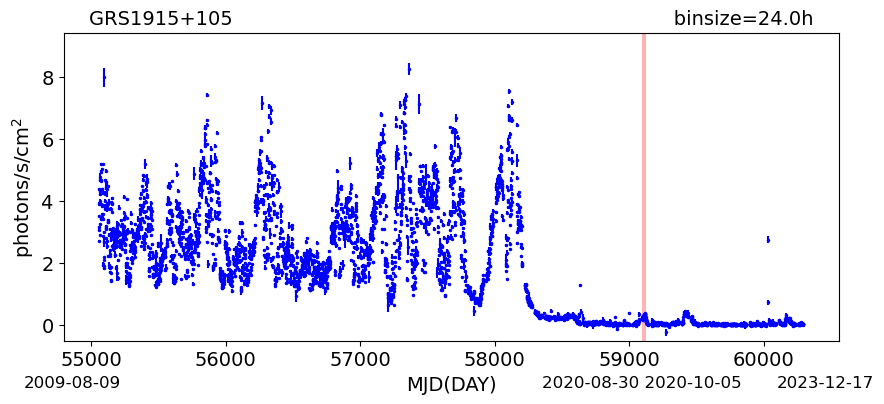

In [80]:
plt.figure(figsize=(10,8))
ax = plt.subplot(211)

ax.set_title('GRS1915+105                                                                        binsize=24.0h',fontsize=14)
ax.title.set_position([0.5,1.05])
#ax.set_xlim(59059,59147)
ax.set_ylim(-0.5,9.43)
#plt.xticks([])
ax.set_ylabel("$\mathrm{photons/s/cm^{2}}$",fontsize=14)
plt.errorbar(mjd,c2_20,e2_20,linestyle="none",fmt="k",marker='.',markersize=3,color='blue')
plt.fill_between([59091.04296296,59127.62585648],-1.1,9.5,facecolor = 'red', alpha = 0.3)
ax.set_xlabel("MJD(DAY)",fontsize=14)
plt.text(54500, -2, "2009-08-09", fontsize=12)
plt.text(60100, -2, "2023-12-17", fontsize=12)
plt.text(58350, -2, "2020-08-30 2020-10-05", fontsize=12)


# ax = plt.subplot(212)
# #ax.set_xlim(59059,59147)
# ax.set_ylim(-0.2,3.)
# ax.set_xlabel("MJD",fontsize=14)
# ax.set_ylabel("Hardness  Ratio\n(4-20 keV/2-4 keV)",fontsize=14)
# plt.errorbar(mjd,hr,ehr,linestyle="none",fmt='k',marker='.',markersize=3,color='blue')
# plt.fill_between([59091.04296296,59127.62585648],-0.2,3,facecolor = 'red', alpha = 0.3)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.subplots_adjust(hspace=0)
plt.savefig("Light curve.png")
plt.savefig('Light-curve.eps',dpi=600,format='eps')

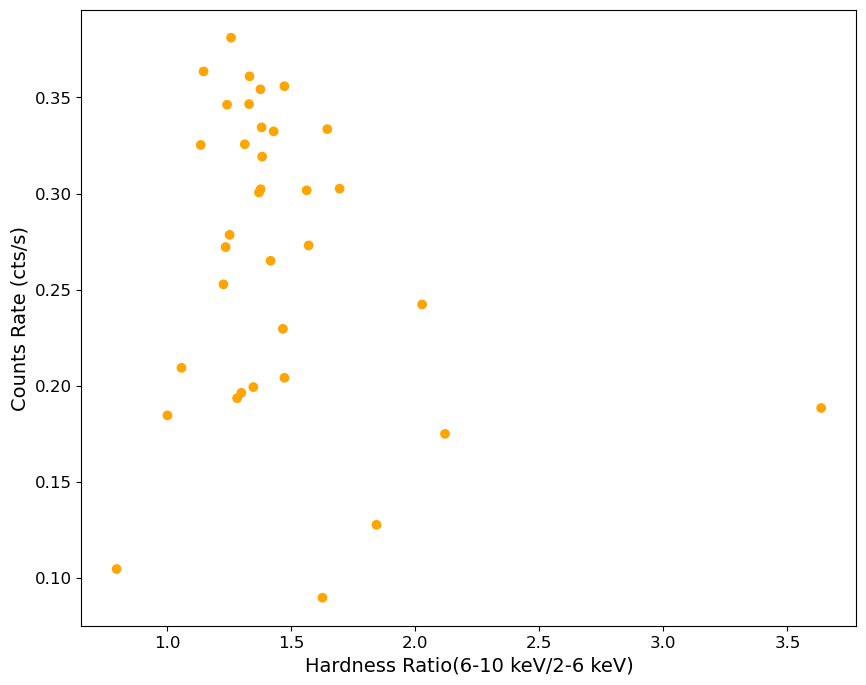

In [89]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.set_xlabel("Hardness Ratio(6-10 keV/2-6 keV)",fontsize=14)
ax.set_ylabel("Counts Rate (cts/s)",fontsize=14)
colors = []
for value in hr:
    if value < 0.25:
        colors.append('b')  
    else:
        colors.append('orange')  
plt.scatter(x=hr[3279:3314],y=c2_20[3279:3314],c=colors[3279:3314])
#ax.axvline(x=0.25,color="red",linewidth=1,linestyle='--')
plt.savefig("HID.png")
plt.savefig('HID.eps',dpi=600,format='eps')

In [81]:
mjd = np.array([59091.04296296, 59092.43438657, 59093.75957176, 59094.75350694, 59095.74747685, 59096.80778935, 59097.60306713, \
        59099.06119213, 59100.58584491, 59101.24880787,59102.44224537, 59103.43688657, \
        59104.63054398, 59106.61993056, 59107.61452546, 59110.00105324, 59110.22834491, 59111.06148148, \
        59111.21150463, 59113.11572917, 59117.5546875 , 59121.19841435, 59123.58354167, 59125.83648148, 59127.62585648])
c2_10 = np.array([22.79, 19.43, 24.95, 20.2, 23.8, 23.25, 27.46, 23.59, 31.51, 26.77, 37.06, 32.98, 37.01, 32.76, 35.76, 34.13, 34.47, 37.96, 40.86, 39.83, 38.33, 35.77, 22.7, 17.34, 8.46])
c2_6 = np.array([18.49, 15.66, 20, 16.19, 19.23, 18.76, 21.87, 18.71, 25.31, 21.21, 29.98, 26.33, 30.37, 26.88, 29.11, 27.33, 27.57, 30.57, 32.61, 32.59, 31.28, 28.63, 18.88, 14.18, 6.48])
c6_10 = np.array([4.21, 3.78, 4.9, 3.98, 4.52, 4.42, 5.54, 4.83, 6.15, 5.5, 7.03, 6.62, 6.58, 5.83, 6.62, 6.74, 6.82, 7.31, 8.18, 7.15, 7.01, 7.08, 3.77, 3.13, 1.93])
e2_10 = np.array([0.17, 0.17, 0.14, 0.12, 0.14, 0.16, 0.14, 0.15, 0.16, 0.17, 0.16, 0.13, 0.2, 0.15, 0.15, 0.2, 0.22, 0.18, 0.28, 0.19, 0.14, 0.16, 0.15, 0.12, 0.13])
e2_6 = np.array([0.15, 0.14, 0.12, 0.10, 0.12, 0.14, 0.12, 0.13, 0.14, 0.14, 0.14, 0.12, 0.18, 0.13, 0.13, 0.17, 0.19, 0.16, 0.25, 0.17, 0.12, 0.14, 0.13, 0.11, 0.11])
e6_10 = np.array([0.09, 0.09, 0.07, 0.06, 0.07, 0.08, 0.07, 0.08, 0.08, 0.09, 0.08, 0.07, 0.10, 0.08, 0.08, 0.1, 0.11, 0.09, 0.14, 0.09, 0.07, 0.08, 0.07, 0.07, 0.07])

hr = c6_10/c2_6
ehr = e6_10**2/c2_6**2 + e2_6**2*c6_10**2/c2_6**4
print(hr)
print(ehr)

[0.22769064 0.24137931 0.245      0.24583076 0.2350494  0.23560768
 0.25331504 0.25815072 0.24298696 0.25931165 0.23448966 0.25142423
 0.21666118 0.21688988 0.22741326 0.24661544 0.24737033 0.23912332
 0.2508433  0.21939245 0.22410486 0.24729305 0.1996822  0.22073343
 0.29783951]
[2.71044385e-05 3.76861020e-05 1.44109000e-05 1.60399442e-05
 1.54020653e-05 2.12765421e-05 1.21765927e-05 2.14996235e-05
 1.17971936e-05 2.09351081e-05 8.31966013e-06 8.38099570e-06
 1.24910138e-05 9.95799871e-06 8.58399998e-06 1.57413566e-05
 1.88250781e-05 1.02338708e-05 2.21293773e-05 8.93604435e-06
 5.74712831e-06 9.27025698e-06 1.56369325e-05 2.73013665e-05
 1.42255642e-04]


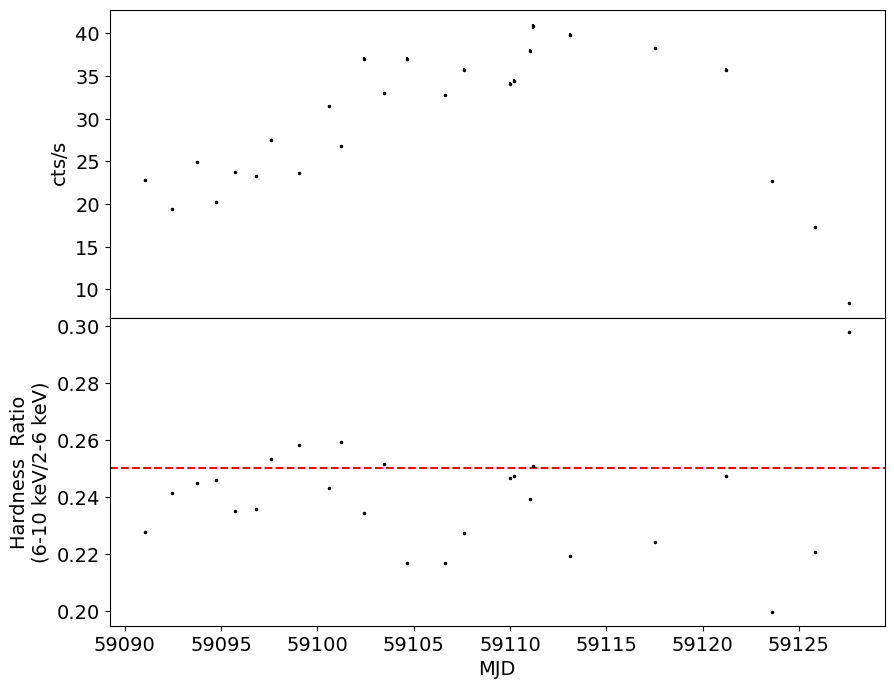

In [84]:
plt.figure(figsize=(10,8))
ax = plt.subplot(211)
# ax.set_xlim(55057,60050)
ax.set_ylabel("$\mathrm{cts/s}$",fontsize=14)
plt.xticks([])
plt.errorbar(mjd,c2_10,e2_10,linestyle="none",fmt="k",marker='.',markersize=3)
plt.yticks(fontsize=14)
# ax.axvline(x=58519,color="red",linewidth=1)
# ax.axvline(x=58529,color="red",linewidth=1)
# ax.axvline(x=58520,color="red",linewidth=1)
# ax.axvline(x=58522,color="red",linewidth=1)
# ax.axvline(x=58527,color="red",linewidth=1)
# ax.axvline(x=58528,color="red",linewidth=1)
#ax.axvline(x=58533,color="red",linewidth=1)
#ax.axvline(x=58534,color="red",linewidth=1)


ax = plt.subplot(212)
# ax.set_xlim(55057,60050)
# ax.set_ylim(-0.2,2.8)
ax.set_xlabel("MJD",fontsize=14)
ax.set_ylabel("Hardness  Ratio\n(6-10 keV/2-6 keV)",fontsize=14)
plt.errorbar(mjd,hr,ehr,linestyle="none",fmt='k',marker='.',markersize=3)
plt.axhline(y=0.25, color='r', linestyle='--')
# ax.axvline(x=58519,color="red",linewidth=1)
# ax.axvline(x=58529,color="red",linewidth=1)
# ax.axvline(x=58520,color="red",linewidth=1)
# ax.axvline(x=58522,color="red",linewidth=1)
# ax.axvline(x=58527,color="red",linewidth=1)
# ax.axvline(x=58528,color="red",linewidth=1)
#ax.axvline(x=58533,color="red",linewidth=1)
#ax.axvline(x=58534,color="red",linewidth=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.subplots_adjust(hspace=0)
plt.savefig("HR.png")
plt.savefig('HR.eps',dpi=600,format='eps')

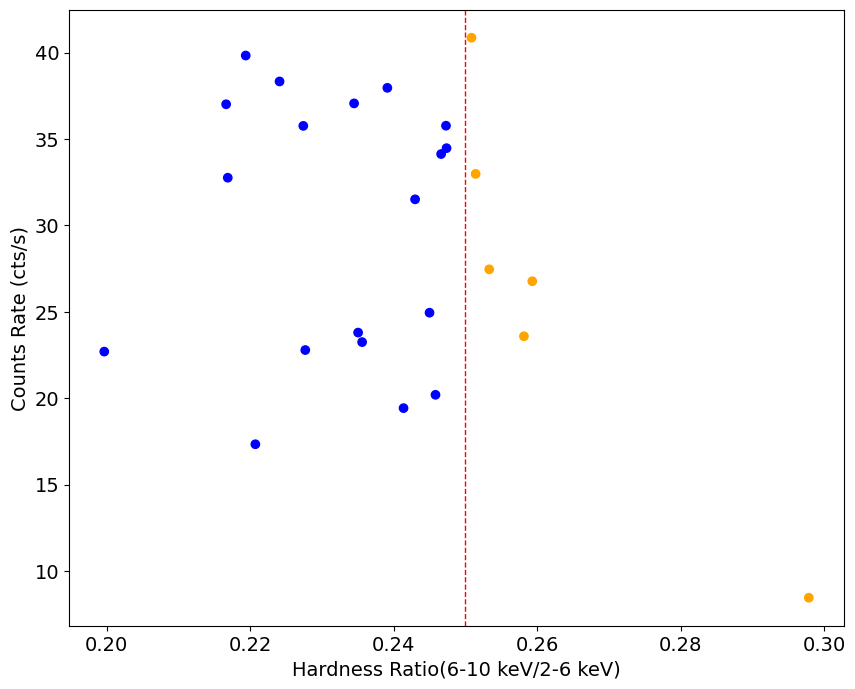

In [85]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_xlabel("Hardness Ratio(6-10 keV/2-6 keV)",fontsize=14)
ax.set_ylabel("Counts Rate (cts/s)",fontsize=14)
colors = []
for value in hr:
    if value < 0.25:
        colors.append('b')  
    else:
        colors.append('orange')  
plt.scatter(x=hr,y=c2_10,c=colors)
ax.axvline(x=0.25,color="red",linewidth=1,linestyle='--')
plt.savefig("HID.png")
plt.savefig('HID.eps',dpi=600,format='eps')